In [358]:
import cv2
import matplotlib.pyplot as plt

In [359]:
def imshow(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [360]:
IMAGE_PATH = './failed/20730990.jpg'

# Load the image
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)


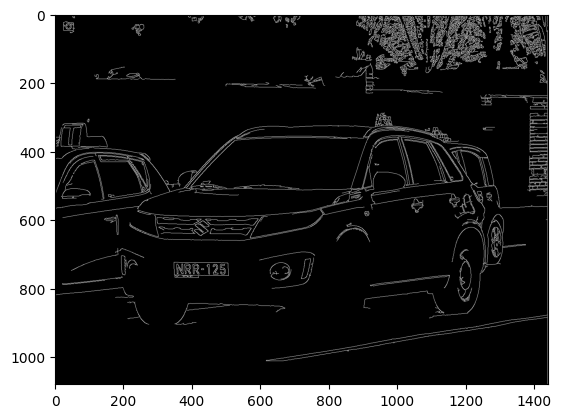

In [361]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=50, threshold2=350)
imshow(edges)

In [362]:
import numpy as np
def has_4_right_angles(approx, bias = 35) -> bool:
    angles = []
    for i in range(4):
        point1 = approx[i][0]
        point2 = approx[(i + 1) % 4][0]
        point3 = approx[(i + 2) % 4][0]
        vector1 = point1 - point2
        vector2 = point3 - point2
        dot_product = np.dot(vector1, vector2)
        magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
        # Calculate the angle in degrees
        angle = np.arccos(dot_product / magnitude_product) * (180 / np.pi)
        # Check if the angle is close to 90 degrees
        if 90-bias <= angle <= 90+bias:
            angles.append(angle)

    return len(angles) == 4

In [363]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rectangles = []
for contour in contours:
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4 and has_4_right_angles(approx):
        rectangles.append(approx)


C:\Users\Ákos\AppData\Local\Temp\ipykernel_2488\1031438033.py:13: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot_product / magnitude_product) * (180 / np.pi)


In [364]:
print(len(rectangles))
max_area = 0
largest_rectangle = None

large_enough_rectangles = []
# Loop through the detected contours and find the largest one
for rectangle in rectangles:
    area = cv2.contourArea(rectangle)
    if area > max_area:
        max_area = area
        largest_rectangle = rectangle

print(max_area)
for rectangle in rectangles:
    area = cv2.contourArea(rectangle)
    if area > 0.0005 * max_area:
        large_enough_rectangles.append(rectangle)

11
806.5


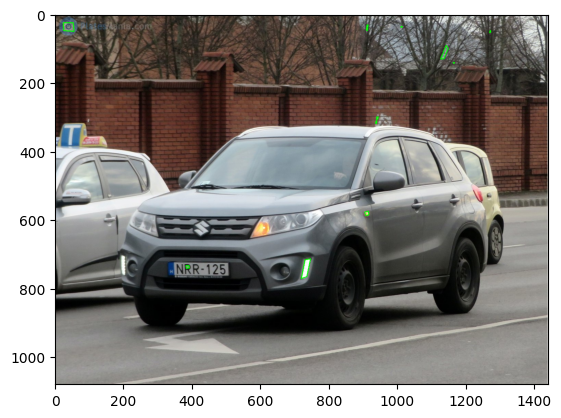

In [365]:
image_copy_all = image.copy()
cv2.drawContours(image_copy_all, large_enough_rectangles, -1, (0, 255, 0), 2)
imshow(image_copy_all)

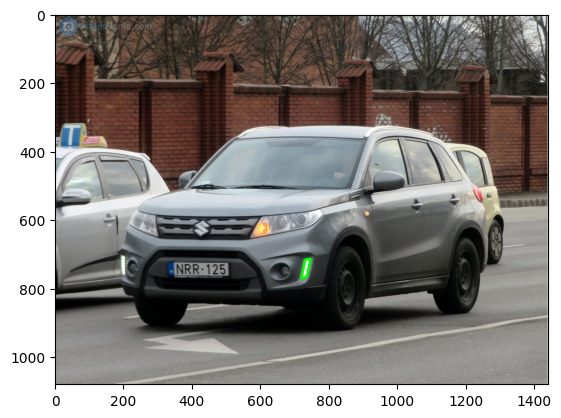

In [366]:
image_copy = image.copy()
cv2.drawContours(image_copy, [largest_rectangle], -1, (0, 255, 0), 5)
imshow(image_copy)

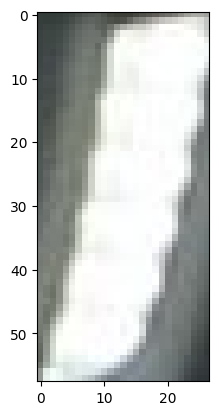

In [367]:
rect_corners = largest_rectangle.reshape(-1, 2)

min_x = min(rect_corners[:, 0])
max_x = max(rect_corners[:, 0])
min_y = min(rect_corners[:, 1])
max_y = max(rect_corners[:, 1])

# Crop the rectangle region from the original image
cropped_image = image[min_y:max_y, min_x:max_x]
imshow(cropped_image)